In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Iris Data

In [ ]:
iris = load_iris()
iris_np = np.concatenate((iris.data, np.expand_dims(iris.target, axis=1)), axis=1)

# Create DataFrame with column names
iris_df = pd.DataFrame(iris_np, columns=['SL', 'SW', 'PL', 'PW', 'Class'])

# Create outlier DataFrame
outlier_df = pd.DataFrame([[3, 5, 6, 3, 1]], columns=['SL', 'SW', 'PL', 'PW', 'Class'], index=[150])

# Append outlier_df to iris_df
iris_df = pd.concat([iris_df, outlier_df], ignore_index=False)

# Extract features from the appended DataFrame
iris_data = iris_df[['SL', 'SW', 'PL', 'PW']].to_numpy()

number of rows in iris_df 151


### Parallel Coordinates

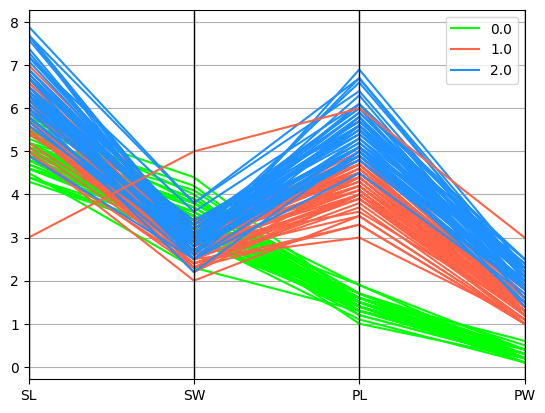

In [ ]:
pd.plotting.parallel_coordinates(frame=iris_df,
                                 class_column="Class",
                                 color=["lime", "tomato","dodgerblue"],
                                 use_columns=['SL','SW','PL','PW']
                                 );

# Univariate

### Boxplot

<Axes: >

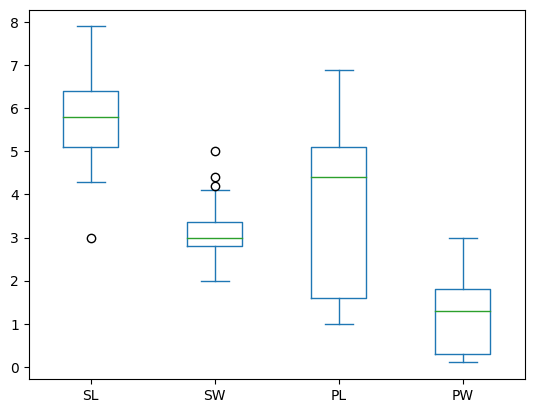

In [ ]:
iris_df[['SL','SW','PL','PW']].plot(kind='box')

## Z scores

$z=\frac{(x−μ)​}{σ}$

In [ ]:
iris_mean = np.mean(iris.data, axis=0)
iris_std = np.std(iris.data, axis=0)
iris_z = (iris.data - iris_mean)/iris_std
iris_z_df = pd.DataFrame(iris_z, columns=['SL_z','SW_z','PL_z','PW_z'])

iris_plus_df =  pd.concat([iris_df, iris_z_df], axis=1)

<Axes: >

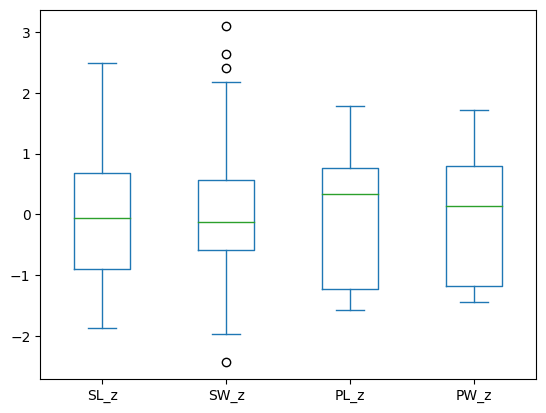

In [ ]:
iris_z_df.plot(kind='box')

### Parallel Coordinates

In [ ]:
iris_plus_df.shape

(151, 9)

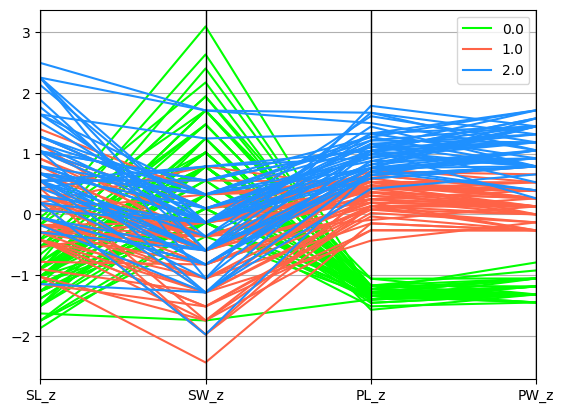

In [ ]:
pd.plotting.parallel_coordinates(
    frame=iris_plus_df[['SL_z','SW_z','PL_z','PW_z', 'Class']],
    class_column="Class",
    color=["lime", "tomato","dodgerblue"]
  );

## t Scores

$t=\frac{(\bar x -\mu)}{(\frac{s}{\sqrt n})}$

$\bar x$ is the sample mean,

$\mu$ is the population mean,

$s$ is the sample standard deviation,

$n$ is the sample size.

In the context of anomaly detection, the t-score is less commonly used compared to the z-score. However, it can still be employed when working with small samples to understand if a particular sample mean significantly deviates from the population mean.
Grubbs' Test for Outliers

## Grubbs' test

The test statistic $G$ compares the maximum deviation from the mean to the standard deviation, and the threshold helps determine if this deviation is statistically significant.

This formula provides a critical value for identifying outliers based on the Grubbs' test, taking into account the sample size and significance level..

### Grubbs' Test Threshold Formula

$\text{grubs_threshold} = \left( \frac{N-1}{\sqrt{N}} \right) \cdot \left( \sqrt{\frac{t^2}{N-2 + t^2}} \right)$

where:
- $N$ is the sample size.
- $t$ is the critical value from the t-distribution with $N-2$ degrees of freedom at the chosen significance level.

### Breaking Down the Formula

1. $\frac{N-1}{\sqrt{N}}$: This term adjusts for the sample size.
2. $\sqrt{\frac{t^2}{N-2 + t^2}}$: This term incorporates the critical value from the t-distribution to account for the confidence level and degrees of freedom.

### Context of the Formula

- **T-Distribution**: The t-distribution critical value $t$ depends on the significance level (e.g., 0.05 for 95% confidence) and degrees of freedom $(N-2)$.

### Application of the Formula

1. **Calculate the t-value** for a given significance level and degrees of freedom \( (N-2) \).
2. **Compute the grubs_threshold** using the formula.
3. **Compare the computed Grubbs' test statistic \( G \)** to the grubs_threshold. If \( G \) exceeds the threshold, the point is considered an outlier.



In [ ]:
from scipy.stats import t
# Get number of rows in iris_df
N = iris_df.shape[0]
print(f"number of rows in iris_df {N}")
alpha = 0.95
t_val = t.ppf(1 - alpha / (2 * N), N - 2)
grubs_threshold = ((N-1)/np.sqrt(N)) * (np.sqrt(t_val**2 / ((N-2 + t_val**2))))
grubs_threshold

number of rows in iris_df 151


2.7027885438337065

## Grubs Test

In [ ]:
iris_plus_df['SL_grub'] = iris_plus_df['SL_z'].abs() >= grubs_threshold
iris_plus_df['SW_grub'] = iris_plus_df['SW_z'].abs() >= grubs_threshold
iris_plus_df['PL_grub'] = iris_plus_df['PL_z'].abs() >= grubs_threshold
iris_plus_df['PW_grub'] = iris_plus_df['PW_z'].abs() >= grubs_threshold

### Visualize Outliers

<Figure size 1000x300 with 0 Axes>

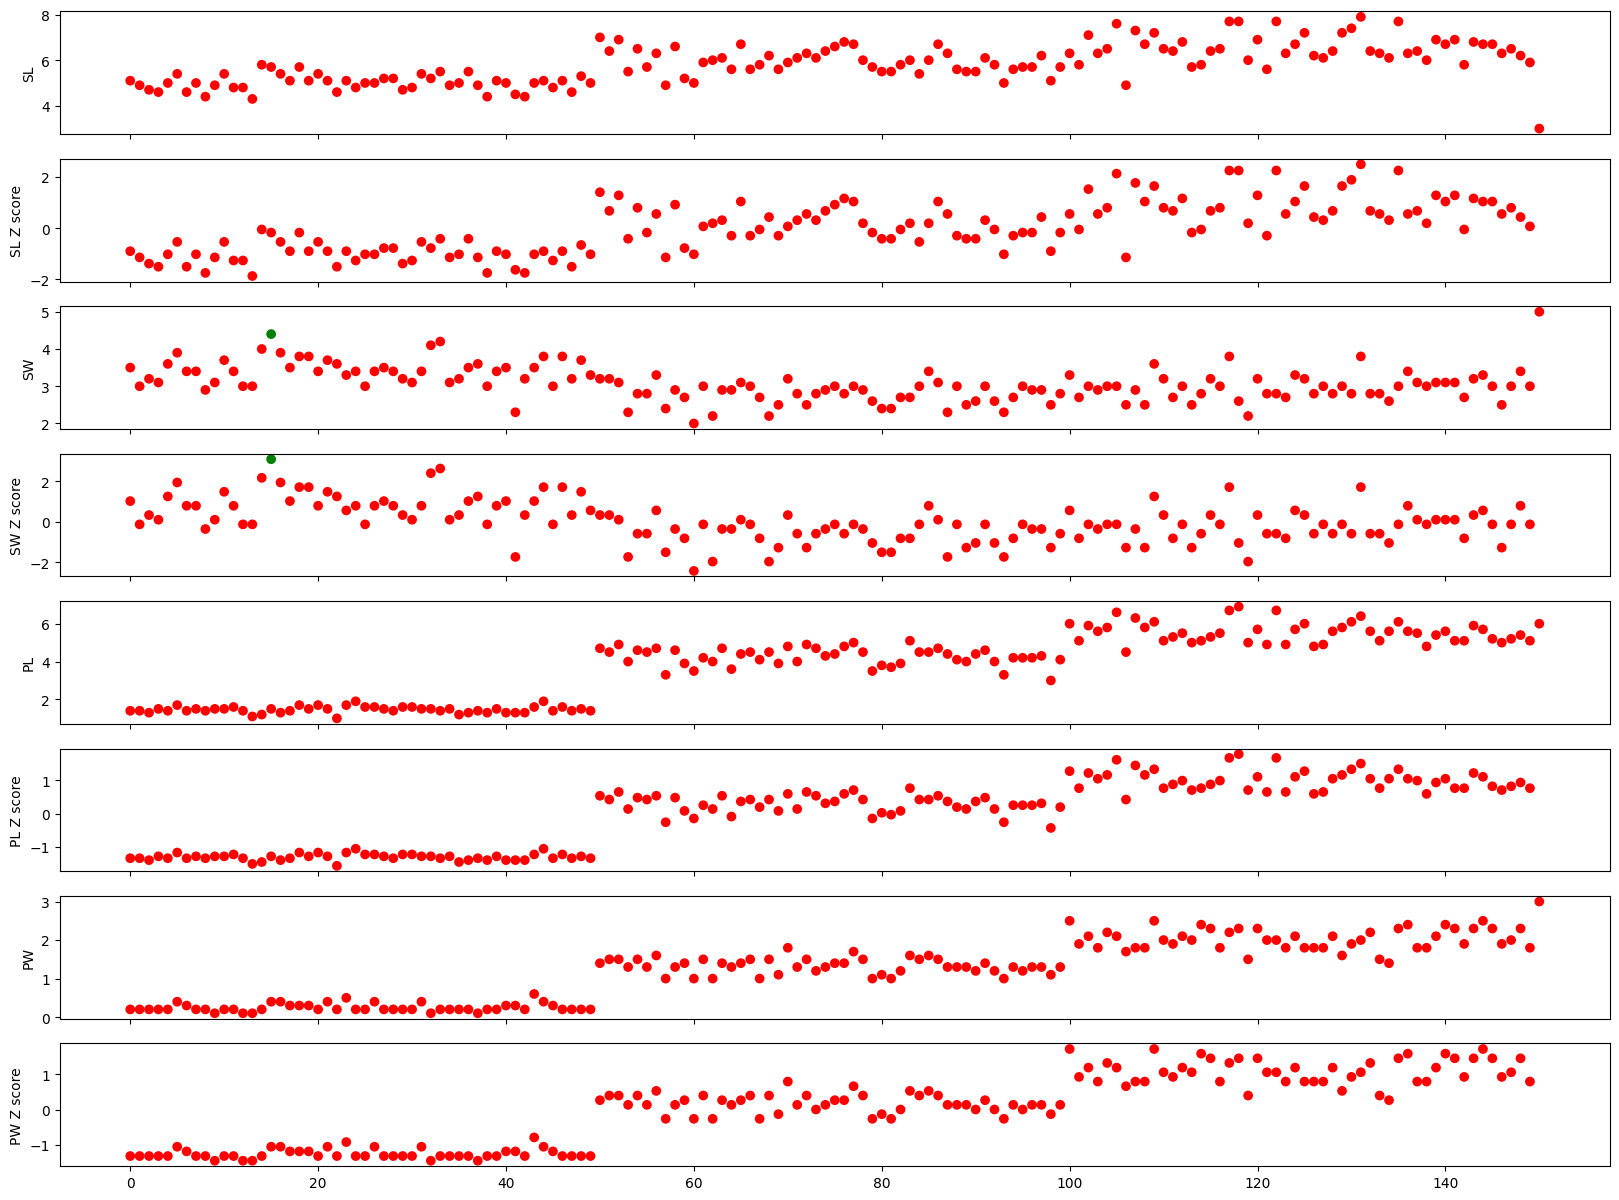

In [ ]:
plt.figure(figsize=(10, 3))
fig, ax = plt.subplots(8, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(20)
colors = {True:'green', False:'red'}
ax[0].scatter(x=range(N), y=iris_plus_df.SL, c=iris_plus_df.SL_grub.map(colors))
ax[0].set_ylabel('SL')
ax[1].scatter(x=range(N), y=iris_plus_df.SL_z, c=iris_plus_df.SL_grub.map(colors))
ax[1].set_ylabel('SL Z score')
ax[2].scatter(x=range(N), y=iris_plus_df.SW, c=iris_plus_df.SW_grub.map(colors))
ax[2].set_ylabel('SW')
ax[3].scatter(x=range(N), y=iris_plus_df.SW_z, c=iris_plus_df.SW_grub.map(colors))
ax[3].set_ylabel('SW Z score')
ax[4].scatter(x=range(N), y=iris_plus_df.PL, c=iris_plus_df.PL_grub.map(colors))
ax[4].set_ylabel('PL')
ax[5].scatter(x=range(N), y=iris_plus_df.PL_z, c=iris_plus_df.PL_grub.map(colors))
ax[5].set_ylabel('PL Z score')
ax[6].scatter(x=range(N), y=iris_plus_df.PW, c=iris_plus_df.PW_grub.map(colors))
ax[6].set_ylabel('PW')
ax[7].scatter(x=range(N), y=iris_plus_df.PW_z, c=iris_plus_df.PW_grub.map(colors))
ax[7].set_ylabel('PW Z score')

plt.show()

# Multivariate

## Aggregated Z Scores
 The aggregated z-score is essentially the sum of squares of these individual z-scores.

In [ ]:
iris_plus_df['Z_agg'] = (iris_plus_df[['SL_z','SW_z','PL_z','PW_z']]**2).sum(axis=1)

## Chi-Square Testing
If the data is normally distributed, the squared z-scores for each dimension are summed up, and the resulting sum follows a chi-square distribution with degrees of freedom equal to the number of dimensions.

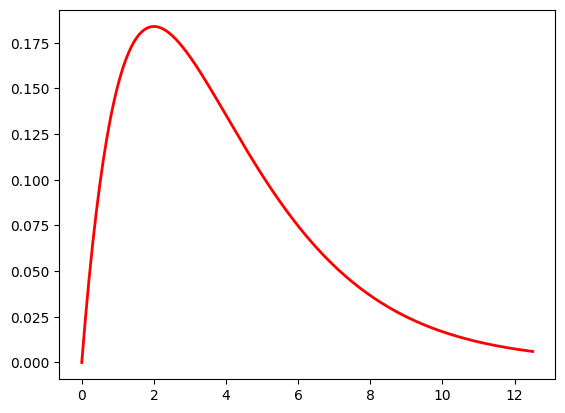

In [ ]:
from scipy.stats import chi2
x = np.arange(0, iris_plus_df.Z_agg.max(), .05)
plt.plot(x, chi2.pdf(x, df=4), color='r', lw=2)
plt.show()

In [ ]:
# threshold from Chi-Sqaure Distribution for detecting outliers
threshold = chi2.ppf(q= 0.95,  # lower tail probability
                     df=4)
threshold

9.487729036781154

In [ ]:
# outliers
iris_plus_df[iris_plus_df.Z_agg > threshold][['SL','SW','PL','PW', 'Z_agg','Class']]
iris_plus_df['Z_agg_Outlier'] = iris_plus_df.Z_agg > threshold

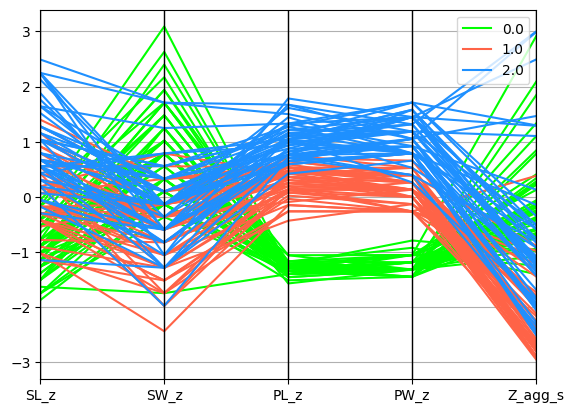

In [ ]:
iris_plus_df['Chi2_pdf'] = chi2.pdf(iris_plus_df['Z_agg'], df=4)
iris_plus_df['Chi2_pdf'] = 1 - chi2.cdf(iris_plus_df['Z_agg'], df=4)
iris_plus_df['Chi2_sf'] = chi2.sf(iris_plus_df['Z_agg'], df=4) # survival function (1 - cdf) or p-value
iris_plus_df['Chi2_logsf'] = chi2.logsf(iris_plus_df['Z_agg'], df=4)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3,3))
iris_plus_df['Z_agg_s'] = scaler.fit_transform(iris_plus_df[['Z_agg']])
pd.plotting.parallel_coordinates(iris_plus_df[['SL_z','SW_z','PL_z','PW_z', 'Z_agg_s', 'Class']], "Class", color=["lime", "tomato","dodgerblue"]);

<Figure size 1000x300 with 0 Axes>

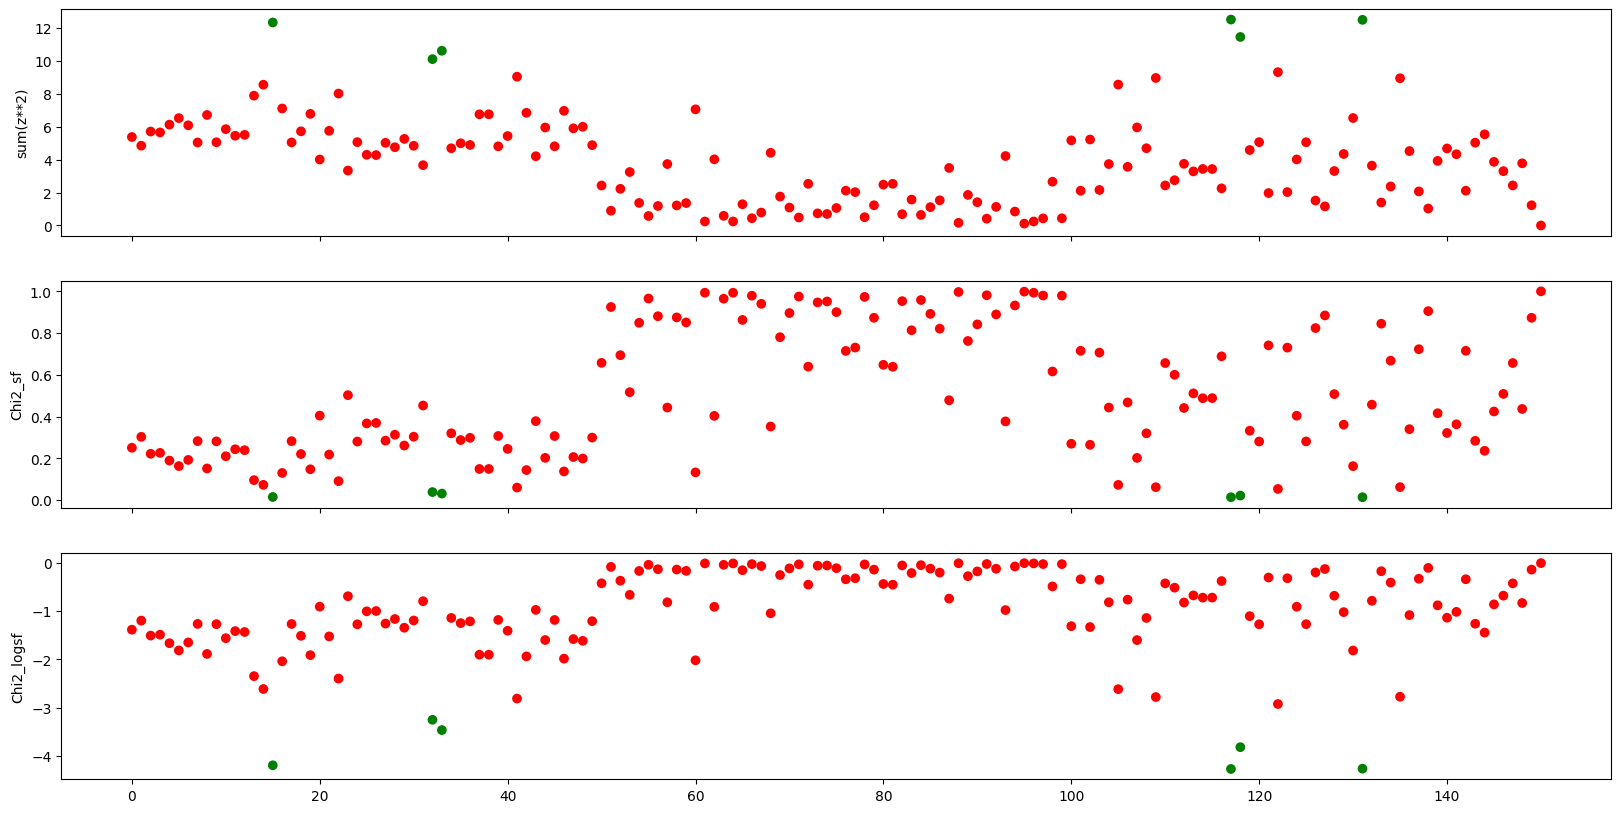

In [ ]:
iris_std = np.std(iris.data, axis=0)
iris_z_agg = (iris_z**2).sum(axis=1)
plt.figure(figsize=(10, 3))
fig, ax = plt.subplots(3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(20)
colors = {True:'green', False:'red'}
ax[0].scatter(x=range(N), y=iris_plus_df['Z_agg'], c=iris_plus_df.Z_agg_Outlier.map(colors))
ax[0].set_ylabel('sum(z**2)')
ax[1].scatter(x=range(N), y=iris_plus_df['Chi2_sf'], c=iris_plus_df.Z_agg_Outlier.map(colors))
ax[1].set_ylabel('Chi2_sf')
ax[2].scatter(x=range(N), y=iris_plus_df['Chi2_logsf'], c=iris_plus_df.Z_agg_Outlier.map(colors))
ax[2].set_ylabel('Chi2_logsf')
plt.show()

## Mahalanobis Distance

### Mahalanobis Distance for Anomaly Detection

Mahalanobis distance is a measure that accounts for the correlations between variables in a multivariate data set, making it a powerful tool for detecting anomalies. It is especially useful because it can identify how far away a data point is from the mean of a distribution, considering the distribution's covariance.

### Definition

The Mahalanobis distance $D_M$ of a data point $\mathbf{x}$ from a mean vector $\boldsymbol{\mu}$ of a distribution with covariance matrix $\mathbf{\Sigma}$ is defined as:

$D_M(\mathbf{x}) = \sqrt{(\mathbf{x} - \boldsymbol{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})}$

### Steps to Calculate Mahalanobis Distance

1. **Compute the Mean Vector** $\boldsymbol{\mu}$:
   - Calculate the mean for each variable in the data set.

2. **Compute the Covariance Matrix** $\mathbf{\Sigma}$:
   - Calculate the covariance matrix of the data set, which represents the variance and covariance among variables.

3. **Compute the Inverse of the Covariance Matrix**$\mathbf{\Sigma}^{-1}$:
   - Find the inverse of the covariance matrix.

4. **Calculate the Mahalanobis Distance**:
   - For each data point $\mathbf{x}$, compute the Mahalanobis distance using the formula above.



In [ ]:
# mean vector
iris_mean = np.mean(iris.data , axis=0).T
# Covariance matrix
cov  = np.cov(iris.data , rowvar=False)
# Covariance matrix power of -1
invcov = np.linalg.matrix_power(cov, -1)

In [ ]:
mahal_dist = []
df = iris_df[['SL', 'SW','PL','PW']]
for i, iris_row in df.iterrows():
      d = (iris_row.to_numpy()-iris_mean).T.dot(invcov).dot(iris_row-iris_mean)
      mahal_dist.append(d)
iris_plus_df['mahal_dist'] = mahal_dist

### Anomaly Detection Using Mahalanobis Distance

1. **Calculate Mahalanobis Distances for All Data Points**:
   - Apply the Mahalanobis distance formula to each data point in the data set.

2. **Determine the Threshold**:
   - Use the chi-square distribution to set a threshold. For \( k \) variables, a typical threshold for anomaly detection could be the chi-square value at a chosen significance level (e.g., 95% confidence level).

3. **Identify Anomalies**:
   - Data points with Mahalanobis distances exceeding the threshold are considered anomalies.

Both methods (aggregated Z-scores and Mahalanobis distance) leverage the chi-square distribution to determine if a data point is an outlier.

In [ ]:
from scipy.stats import chi2
threshold = chi2.ppf(q=0.95, df=4)
print(threshold)
# outliers
iris_plus_df[iris_plus_df.mahal_dist > threshold][['SL','SW','PL','PW', 'Z_agg','Class']]
iris_plus_df['mahal_Outlier'] = iris_plus_df.mahal_dist > threshold

9.487729036781154


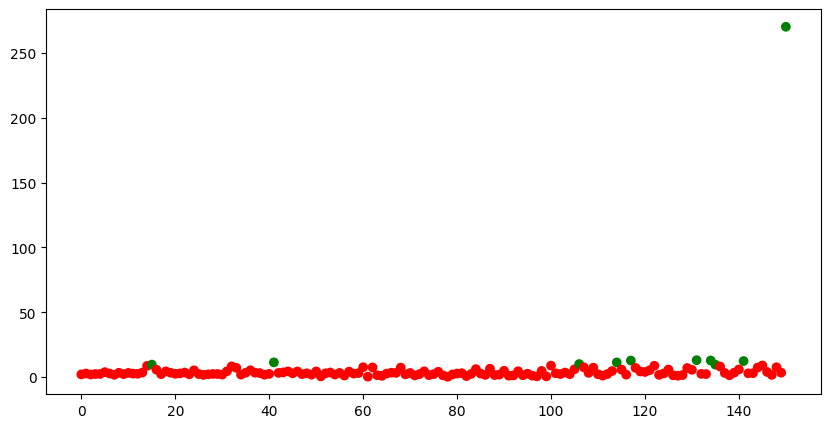

In [ ]:
fig, ax = plt.subplots(1, sharex=True)
fig.set_figheight(5)
fig.set_figwidth(10)
colors = {True:'green', False:'red'}
ax.scatter(x=range(N), y=iris_plus_df['mahal_dist'], c=iris_plus_df.mahal_Outlier.map(colors))
plt.show()